In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tita = pd.read_csv(r'C:\Users\kamil\Desktop\python course stuff\titanic-passengers.csv',
                   sep=';',)

tita.head()
tita.info()
tita.describe()

tita.isna().sum()/len(tita)*100
tita['Embarked'].value_counts().idxmax()

tita.drop('Cabin', axis=1, inplace=True)
tita.Age=tita.Age.fillna(tita.Age.mean())
tita.Embarked=tita.Embarked.fillna('S')

conv_dic= {"Sex":{"female":0, "male":1},"Survived":{"No":0,"Yes":1}}
tita.replace(conv_dic, inplace=True)
tita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S


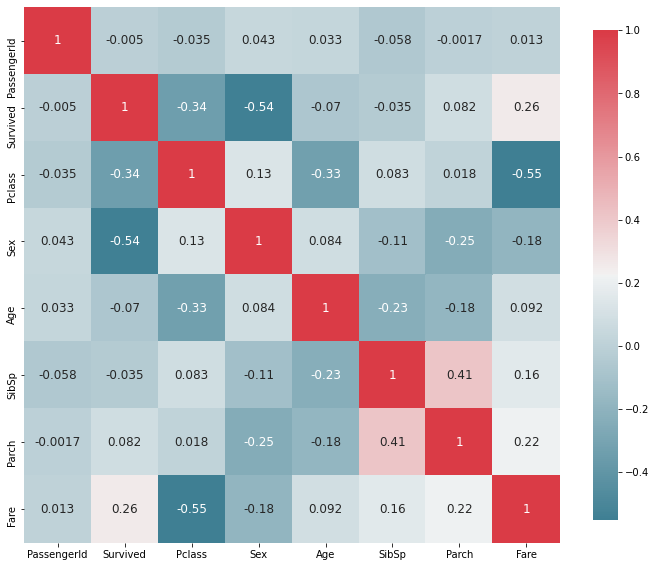

In [4]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
    
#This fonction calculates the correlation betwen two features and gives a value between -1 and 1, a big value means
#that the increase of a feature increases the other, a small value is the opposite, and a value of 0 means no correlation.
    
plot_correlation_map(tita)

In [5]:
x = tita[['Pclass', 'Sex']]
y = tita['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

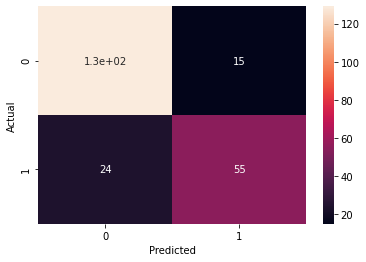

In [6]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.79      0.70      0.74        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



In [12]:
#ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model 
#using different probability thresholds.

#Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value 
#for a predictive model using different probability thresholds.

#ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves 
#are appropriate for imbalanced datasets.

lr_probs=logreg.predict_proba(x_test)
lr_probs=lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc

0.8232243319268635